# Lab 08 - Miary jakości regresji i Walidacja Krzyżowa

## Miary jakości regresji

W przypadku oceny jakości regresji powszechną praktyką jest ocena za pomocą funkcji błędu (kosztu). Typowo, w kontekście optymalizacji, funkcje błędu przyjmują duże wartości dla dużych rozbieżności między predykcjami modelu, a punktem odniesienia i małe dla wartości zbliżonych.

Najpopularniejsze funkcje kosztu w zadaniach regresji to:
- MSE (Mean Squared Error, błąd średniokwadratowy);
- RMSE (Root Mean Squared Error, pierwiastek z błędu średniokwadratowego);
- MAE (Mean Average Error, średni błąd bezwzględny);
- Funkcja Hubera

### 1. **MSE (Mean Squared Error) - Błąd Średniokwadratowy**

MSE mierzy średnią kwadratową różnicę między wartościami rzeczywistymi a prognozowanymi przez model. Im mniejsza wartość MSE, tym lepsza dokładność modelu.

**Wzór:**
$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$
gdzie:
- $( y_i )$ to rzeczywista wartość dla $( i )$ -tego punktu,
- $( \hat{y}_i )$ to przewidywana wartość dla $( i )$ -tego punktu,
- $( n )$ to liczba punktów danych.

### 2. **RMSE (Root Mean Squared Error) - Pierwiastek z Błędu Średniokwadratowego**

RMSE to pierwiastek kwadratowy z MSE, co sprawia, że jednostka tej miary jest taka sama jak jednostka danych (w przeciwieństwie do MSE, gdzie jednostka jest kwadratem jednostki danych).

**Wzór:**
$
\text{RMSE} = \sqrt{\text{MSE}}
$
gdzie MSE to błąd średniokwadratowy.

### 3. **MAE (Mean Absolute Error) - Średni Błąd Bezwzględny**

MAE mierzy średnią bezwzględną różnicę między wartościami rzeczywistymi a prognozowanymi. Jest to bardziej intuicyjna miara, ponieważ nie karze tak bardzo dużych błędów, jak MSE, ponieważ nie bierze pod uwagę kwadratu błędu.

**Wzór:**
$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$
gdzie:
- $( y_i )$ to rzeczywista wartość dla $( i )$-tego punktu,
- $( \hat{y}_i )$ to przewidywana wartość dla $( i )$-tego punktu,
- $( n )$ to liczba punktów danych.

### 4. **Funkcja Hubera**

Funkcja Hubera to miara, która łączy cechy MSE i MAE. Działa jak MSE dla małych błędów, a jak MAE dla dużych błędów, dzięki czemu jest bardziej odporna na wartości odstające (outliers) niż MSE, ale jest mniej czuła na małe różnice niż MAE. Jest to szczególnie przydatne w sytuacjach, gdzie dane zawierają dużą liczbę wartości odstających.

**Wzór:**
$
\text{Huber}(y, \hat{y}) = 
\begin{cases} 
\frac{1}{2}(y - \hat{y})^2 & \text{dla } |y - \hat{y}| \leq \delta \\
\delta (|y - \hat{y}| - \frac{1}{2}\delta) & \text{dla } |y - \hat{y}| > \delta
\end{cases}
$
gdzie:
- $( y )$ to wartość rzeczywista,
- $( \hat{y} )$ to wartość przewidywana,
- $( \delta )$ to próg, który decyduje o tym, kiedy stosować kwadratową karę (jak w MSE) lub liniową (jak w MAE).

Funkcja Hubera jest użyteczna, ponieważ ma właściwości obu miar, co sprawia, że jest bardziej elastyczna w różnych warunkach danych.

### 4. **$ R^2 $**

Metryka **R² (coefficient of determination)** to jedna z najczęściej stosowanych miar oceny jakości modeli regresyjnych.

R² mierzy, **jak dobrze model regresji wyjaśnia zmienność wartości rzeczywistych**.

Można o niej myśleć tak:

* **R² = 1** → model idealnie przewiduje dane
* **R² = 0** → model jest tak dobry jak przewidywanie średnią
* **R² < 0** → model jest gorszy niż przewidywanie średniej

**Interpretacja:**
R² pokazuje, jaka **część wariancji zmiennej zależnej** została wyjaśniona przez model.

Np. R² = 0.85 oznacza, że model wyjaśnia 85% zmienności danych.

##### Wzór na R²

[
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
]

gdzie:

* ( y_i ) – wartości rzeczywiste
* ( \hat{y}_i ) – wartości przewidziane
* ( \bar{y} ) – średnia z wartości rzeczywistych

Mianownik to tzw. *wariancja całkowita*, a licznik to *błąd modelu*.

##### Kiedy R² ma sens?

✔️ Gdy zmienna zależna jest ciągła
✔️ Gdy porównujemy modele na tych samych danych

Większość regresorów w scikit-learn domyślnie zwraca R². Możemy ją wywołać poprzez metodę `.score()` na wytrenowanym regresorze.


##### Kiedy uważać na R²?

* **Nie nadaje się do oceny modeli nieliniowych**, jeśli dane są nieliniowe i bardzo złożone (może wprowadzać w błąd).
* **Nie wykrywa przeuczenia** – model może mieć wysokie R² na danych treningowych, a niskie na testowych.
* W wersji **"adjusted R²"** (skorygowane R²) karze model za zbyt dużą liczbę cech – scikit-learn go nie liczy automatycznie.

In [1]:
import numpy as np
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [3]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    huber_loss = np.where(np.abs(error) < delta, 0.5 * error ** 2, delta * (np.abs(error) - 0.5 * delta))
    
    return np.mean(huber_loss)

In [4]:
data = load_diabetes()
X = data.data
y = data.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = model.score(X_test, y_true)
print("R2:", r2)

R2: 0.35084688026982036


In [6]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
huber_val = huber_loss(y_true, y_pred)
r2_val = r2_score(y_true, y_pred)

In [7]:
print(f'MSE: {mse}\nRMSE: {rmse}\nMAE: {mae}\nHuber: {huber_val}\nR2: {r2_val}')

MSE: 3747.429261040175
RMSE: 61.216249975314355
MAE: 49.807701862524546
Huber: 49.307701862524546
R2: 0.35084688026982036


In [8]:
print(f'Min y value: {y.min()}\nMax y value: {y.max()}\nDiff y value: {y.max() - y.min()}\nAvg y val: {y.sum()/len(y)}')

Min y value: 25.0
Max y value: 346.0
Diff y value: 321.0
Avg y val: 152.13348416289594


## Metody oceny jakości modeli

### Train & test

- Najprostsza metoda, w której zbiór danych jest dzielony na dwie części: treningową i testową;
- model jest trenowany na danych treningowych, a następnie testowany na danych testowych;
- ocena jakości modelu opiera się na wynikach testowych, takich jak dokładność czy błąd średniokwadratowy w przypadku regresji.

### Walidacja krzyżowa

- Pomaga zminimalizować wpływ losowego podziału danych na jakość modelu;
- zbiór danych jest dzielony na kilka części (k-fold), a model jest trenowany i testowany krotnie, z różnymi zestawami danych;
- wyniki są uśredniane, co daje bardziej stabilną ocenę jakości modelu.

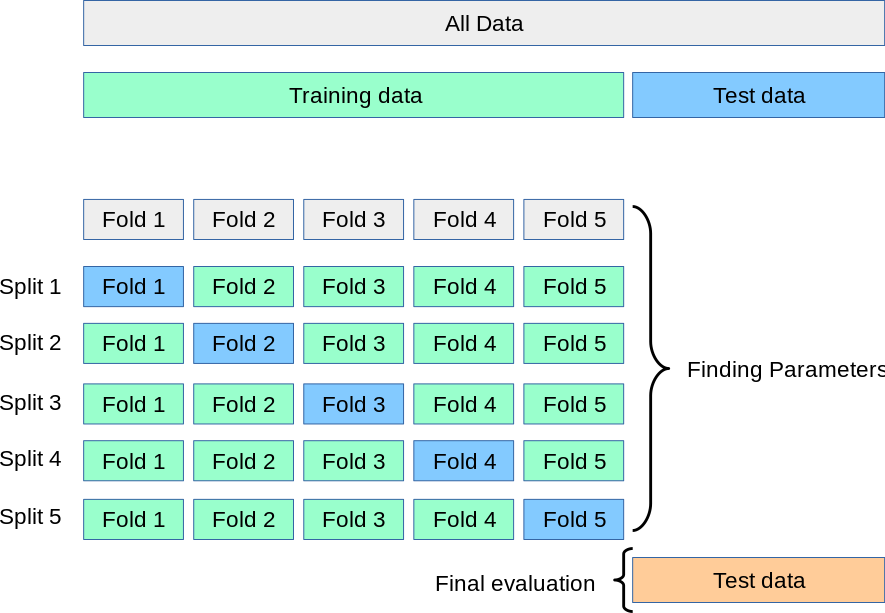

# Czym jest walidacja krzyżowa i po co jej używać?

Walidacja krzyżowa to technika oceny modelu, która wielokrotnie dzieli dane na zbiory treningowe i walidacyjne, trenuje model i sprawdza jego jakość. Główne cele:

* **Rzetelna ocena uogólnienia** modelu (mniej wariancji niż pojedynczy split train/test).
* **Wykrywanie przeuczenia** — jeśli wynik na val jest dużo gorszy niż na train, mamy overfitting.
* **Wybór hiperparametrów** (np. w GridSearchCV) i porównanie wielu modeli.
* **Użycie każdego przykładu do testu** (np. w Leave-One-Out), co jest ważne przy małych zbiorach.

# Główne problemy które rozwiązuje CV

* Niestabilność oceny wynikająca z losowego podziału.
* Zbyt optymistyczne metryki przy jednym, „szczęśliwym” podziale.
* Potrzeba estymacji wariancji wyniku (średnia ± std over folds).

---

# Typy walidacji krzyżowej

## 1. K-Fold CV (`KFold`)

* Dzieli dane na K równych części (foldów). Dla każdej iteracji używa K−1 foldów jako train i 1 fold jako test.
* **Zastosowanie:** uniwersalna metoda; dobry default (np. K=5 lub K=10).
* **Uwaga:** nie zachowuje proporcji klas — użyj stratified dla klasyfikacji.

## 2. Stratified K-Fold (`StratifiedKFold`)

* Zachowuje proporcje klas w każdym foldzie.
* **Zastosowanie:** klasyfikacja z nierównymi klasami (imbalanced).

## 3. Leave-One-Out (`LeaveOneOut`, LOO)

* Każdy „fold” to dokładnie jeden przykład jako test, reszta jako train.
* **Zastosowanie:** bardzo małe zbiory (np. <200 próbek).
* **Uwaga:** kosztowny obliczeniowo i bardzo wariancyjny.

## 4. Leave-P-Out (`LeavePOut`)

* Podobnie jak LOO, ale p próbek w teście. Rzadko stosowane (kombinatoryczny wzrost).

## 5. RepeatedKFold

* Powtarza KFold kilka razy z innym losowym podziałem. Przydatne, by lepiej oszacować wariancję.

## 6. ShuffleSplit

* Losowe podziały na train/test wiele razy (niezależne foldy). Daje kontrolę nad proporcjami train/test.
* **Zastosowanie:** gdy chcesz wielokrotne losowe próbkowanie zamiast „blokowego” KFold.

## 7. GroupKFold

* Zapewnia, że wszystkie próbki z tej samej grupy (np. pacjent, klient) trafią do tego samego foldu.
* **Zastosowanie:** dane zależne grupowo (pomiarów wielokrotnych dla tej samej jednostki).

## 8. TimeSeriesSplit

* Specjalny dla danych szeregów czasowych: nie miesza przeszłości z przyszłością. Zazwyczaj coraz większe okno treningowe, test jest następny okres.
* **Zastosowanie:** predykcja na danych czasowych.

---

# Najważniejsze zasady praktyczne / pułapki

* **Brak przecieku informacji (data leakage):** preprocessing (standaryzacja, imputacja) musi być wewnątrz pipeline i wykonywany **oddzielnie** na każdym foldzie (fit tylko na train, transform na test).
* **Stratification** dla klasyfikacji — bez tego foldy mogą być niereprezentatywne.
* **GroupKFold** gdy jednostki powiązane; ignorowanie tego = przeciek i zawyżone wyniki.
* **TimeSeriesSplit** zamiast losowania w szeregach czasowych.
* **Używaj stałego `random_state`** dla reprodukowalności.
* **Nie porównuj R² z różnych zbiorów bez kontekstu** (różne foldy, różne podziały).


# 1. Prosty K-Fold używając `cross_val_score`

In [9]:
from sklearn.model_selection import cross_val_score, KFold

X, y = load_diabetes(return_X_y=True)
model = LinearRegression()

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')  # domyślnie negatywne dla minimizerów

print("R2 per fold:", scores)
print("Mean R2: {:.3f} ± {:.3f}".format(scores.mean(), scores.std()))


R2 per fold: [0.45260276 0.57320015 0.39144785 0.58428888 0.39081186]
Mean R2: 0.478 ± 0.085


# 2. Kilka metryk naraz: `cross_validate`

In [10]:
from sklearn.model_selection import cross_validate

scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error'
}

res = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
# res zawiera keys: test_r2, train_r2, test_neg_mse, fit_time, score_time etc.

import numpy as np
print("Test R2 mean/std:", np.mean(res['test_r2']), np.std(res['test_r2']))
print("Test RMSE mean:", np.sqrt(-np.mean(res['test_neg_mse'])))

Test R2 mean/std: 0.47847030225778475 0.0849674692576176
Test RMSE mean: 54.91249124094873


# 3. Manualny loop po foldach (gdy chcesz policzyć własne metryki lub logikę)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

In [12]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2s = []
rmses = []

for train_idx, test_idx in kf.split(X):
    X_tr, X_te = X[train_idx], X[test_idx]
    y_tr, y_te = y[train_idx], y[test_idx]
    
    pipe.fit(X_tr, y_tr)              # pipeline np. ze skalowaniem
    y_pred = pipe.predict(X_te)
    
    r2s.append(r2_score(y_te, y_pred))
    rmses.append(np.sqrt(mean_squared_error(y_te, y_pred)))

print("R2 per fold:", r2s)
print("Mean R2:", np.mean(r2s), "Std:", np.std(r2s))
print("Mean RMSE:", np.mean(rmses))


R2 per fold: [0.45414652070698236, 0.5716743490155612, 0.39192087242175, 0.5831686112551524, 0.39444940244729576]
Mean R2: 0.4790719511693483 Std: 0.0834132868201562
Mean RMSE: 54.82705421208429


# 4. Out-of-fold predykcje: `cross_val_predict`

OOF R2: 0.49214280010102074


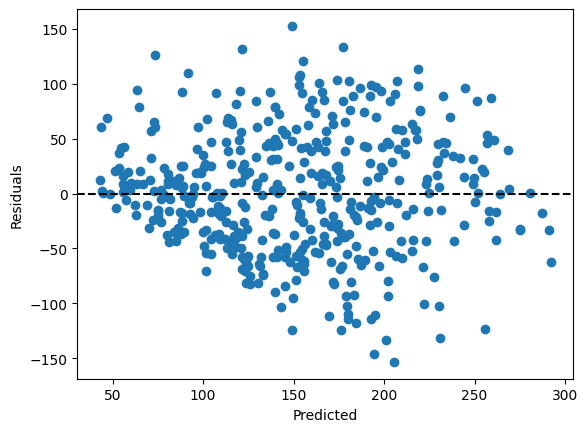

In [13]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

oof_preds = cross_val_predict(pipe, X, y, cv=cv)  # predykcje dla każdej próbki z foldu, w którym była testem
# teraz policz R2 na oof_preds:
from sklearn.metrics import r2_score
print("OOF R2:", r2_score(y, oof_preds))

# residual plot
residuals = y - oof_preds
plt.scatter(oof_preds, residuals)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


# 5. GroupKFold

In [15]:
def print_summary(mse_list, r2_list, name):
    print(f"\n*** PODSUMOWANIE: {name} ***")
    print(f"Średni MSE: {np.mean(mse_list):.4f}  (std={np.std(mse_list):.4f})")
    print(f"Średni R2 : {np.mean(r2_list):.4f}  (std={np.std(r2_list):.4f})")

In [16]:
from sklearn.model_selection import GroupKFold
groups = np.random.randint(0, 10, size=len(X))  # 10 losowych sztucznych grup

print("Rozmiar X:", X.shape)
print("Rozmiar y:", y.shape)

mse_list, r2_list = [], []


gkf = GroupKFold(n_splits=5)

for fold, (train_idx, test_idx) in enumerate(gkf.split(X, y, groups)):
    model.fit(X[train_idx], y[train_idx])
    preds = model.predict(X[test_idx])

    mse = mean_squared_error(y[test_idx], preds)
    r2 = r2_score(y[test_idx], preds)
    mse_list.append(mse)
    r2_list.append(r2)

    print(f"\nFold {fold}")
    print("Grupy test:", np.unique(groups[test_idx]))
    print("MSE:", mse, "R2:", r2)
    
print_summary(mse_list, r2_list, "GroupKFold")

Rozmiar X: (442, 10)
Rozmiar y: (442,)

Fold 0
Grupy test: [1 8]
MSE: 3274.140461394766 R2: 0.45083422950325824

Fold 1
Grupy test: [0 2]
MSE: 2481.6937136748616 R2: 0.4972827152782351

Fold 2
Grupy test: [4 6]
MSE: 3303.4589701621635 R2: 0.41622745327767763

Fold 3
Grupy test: [7 9]
MSE: 3064.286221535164 R2: 0.5409006828704028

Fold 4
Grupy test: [3 5]
MSE: 2996.813471522288 R2: 0.5207174058718644

*** PODSUMOWANIE: GroupKFold ***
Średni MSE: 3024.0786  (std=295.6774)
Średni R2 : 0.4852  (std=0.0457)


# 6. StratifiedKFold

In [17]:
from sklearn.model_selection import StratifiedKFold

# Dyskretyzacja y do StratifiedKFold
y_binned = np.digitize(y, bins=np.percentile(y, [25, 50, 75]))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

mse_list, r2_list = [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_binned)):
    model.fit(X[train_idx], y[train_idx])
    preds = model.predict(X[test_idx])

    mse = mean_squared_error(y[test_idx], preds)
    r2 = r2_score(y[test_idx], preds)
    mse_list.append(mse)
    r2_list.append(r2)

    print(f"\nFold {fold}")
    print("MSE:", mse, "R2:", r2)

print_summary(mse_list, r2_list, "StratifiedKFold")



Fold 0
MSE: 2821.062154282986 R2: 0.4770760248346505

Fold 1
MSE: 2811.7993564146896 R2: 0.5679294215804689

Fold 2
MSE: 3355.5479380503984 R2: 0.4208602049789172

Fold 3
MSE: 3648.697335694575 R2: 0.33846629773120207

Fold 4
MSE: 2823.536612779508 R2: 0.5610615821474603

*** PODSUMOWANIE: StratifiedKFold ***
Średni MSE: 3092.1287  (std=347.3792)
Średni R2 : 0.4731  (std=0.0867)


# 7. Leave-One-Out

In [18]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

preds_all = []
y_all = []

for train_idx, test_idx in loo.split(X):
    model.fit(X[train_idx], y[train_idx])
    pred = model.predict(X[test_idx])[0]

    preds_all.append(pred)
    y_all.append(y[test_idx][0])

mse = mean_squared_error(y_all, preds_all)
r2 = r2_score(y_all, preds_all)

print(f"Global LOO MSE: {mse}")
print(f"Global LOO R2 : {r2}")

Global LOO MSE: 3001.7528469994304
Global LOO R2 : 0.49379239240150885


# 8. Leave-P-Out (p=2)

In [19]:
from sklearn.model_selection import LeavePOut

lpo = LeavePOut(p=2)

preds_all = []
y_all = []

for train_idx, test_idx in lpo.split(X):
    model.fit(X[train_idx], y[train_idx])
    pred = model.predict(X[test_idx])

    preds_all.extend(pred)
    y_all.extend(y[test_idx])

mse = mean_squared_error(y_all, preds_all)
r2 = r2_score(y_all, preds_all)

print(f"LPO MSE: {mse}")
print(f"LPO R2 : {r2}")

LPO MSE: 3001.923459594643
LPO R2 : 0.4937636207477283


# 9. RepeatedKFold

In [21]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

mse_list, r2_list = [], []

mse_list, r2_list = [], []

for fold, (train_idx, test_idx) in enumerate(rkf.split(X)):
    model.fit(X[train_idx], y[train_idx])
    preds = model.predict(X[test_idx])

    mse = mean_squared_error(y[test_idx], preds)
    r2 = r2_score(y[test_idx], preds)
    mse_list.append(mse)
    r2_list.append(r2)

    print(f"\nFold {fold}")
    print("MSE:", mse, "R2:", r2)

print_summary(mse_list, r2_list, "RepeatedKFold")


Fold 0
MSE: 2900.1936284934827 R2: 0.45260276297191915

Fold 1
MSE: 2662.6376086196146 R2: 0.5732001497272168

Fold 2
MSE: 3312.3058888352602 R2: 0.39144785125488846

Fold 3
MSE: 2797.883552555743 R2: 0.5842888825400094

Fold 4
MSE: 3403.8877929322553 R2: 0.3908118647948903

Fold 5
MSE: 2554.823190612049 R2: 0.6083610957824865

Fold 6
MSE: 3395.581558706345 R2: 0.41074312283533143

Fold 7
MSE: 3550.281824929695 R2: 0.41355316349878446

Fold 8
MSE: 2740.7125510945552 R2: 0.4472015188755416

Fold 9
MSE: 2866.475516494087 R2: 0.5353666528325193

Fold 10
MSE: 2665.6043981745856 R2: 0.4814838500888644

Fold 11
MSE: 3431.535054015521 R2: 0.4955732801442474

Fold 12
MSE: 3033.168518140685 R2: 0.5327591832360106

Fold 13
MSE: 3340.8612929259366 R2: 0.35590209819739516

Fold 14
MSE: 2788.4692895269104 R2: 0.5271295194436388

*** PODSUMOWANIE: RepeatedKFold ***
Średni MSE: 3029.6281  (std=328.0985)
Średni R2 : 0.4800  (std=0.0760)


# 10. ShuffleSplit

In [22]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

mse_list, r2_list = [], []

for fold, (train_idx, test_idx) in enumerate(ss.split(X)):
    model.fit(X[train_idx], y[train_idx])
    preds = model.predict(X[test_idx])

    mse = mean_squared_error(y[test_idx], preds)
    r2 = r2_score(y[test_idx], preds)
    mse_list.append(mse)
    r2_list.append(r2)

    print(f"\nFold {fold}")
    print("MSE:", mse, "R2:", r2)

print_summary(mse_list, r2_list, "ShuffleSplit")



Fold 0
MSE: 2900.19362849348 R2: 0.4526027629719197

Fold 1
MSE: 2554.82319061205 R2: 0.6083610957824863

Fold 2
MSE: 2665.6043981745865 R2: 0.4814838500888643

Fold 3
MSE: 3393.4214437333244 R2: 0.4270038127035055

Fold 4
MSE: 3108.6321845334187 R2: 0.5032287082608262

*** PODSUMOWANIE: ShuffleSplit ***
Średni MSE: 2924.5350  (std=302.6783)
Średni R2 : 0.4945  (std=0.0625)


# Zadania

**Zadanie 1**: Porównanie różnych miar jakości regresji na dużym zbiorze danych <br>
Wykorzystaj zbiór danych `California housing` dostępny w `scikit-learn` do porównania różnych miar jakości regresji. Podziel dane na zbiór treningowy i testowy, a następnie oblicz MSE, RMSE, MAE oraz funkcję Hubera na modelu regresji liniowej.

* Załaduj dane `California housing`.
* Podziel dane na zbiór treningowy (80%) i testowy (20%).
* Wytrenuj model regresji liniowej.
* Oblicz MSE, RMSE, MAE, oraz funkcję Hubera na zbiorze testowym.
* Przedstaw wykres porównujący błędy.

**Zadanie 2**: Walidacja krzyżowa na kilku modelach <br>
Załaduj dane `wine` ze `scikit-learn` i porównaj 3 modele regresji: regresję liniową, regresję grzbietową i Lasso, wykorzystując walidację krzyżową z 5-folds.

* Załaduj dane `wine`.
* Zastosuj 3 modele regresji: `LinearRegression`, `Ridge`, i `Lasso`.
* Wykonaj walidację krzyżową 5-krotną dla każdego modelu.
* Porównaj wyniki (średnia MSE, RMSE, MAE).

**Zadanie 3**: Repeated K-fold Cross-Validation <br>
Przeprowadź *repeated k-fold cross-validation* na modelu `RandomForestRegressor` na dowolnym zbiorze danych z `scikit-learn` (do klasyfikacji regresji), wykonując powtórzenie 5-krotne z *𝑘 = 10*.

* Załaduj dane.
* Zastosuj `RandomForestRegressor`.
* Wykonaj repeated 5-krotną walidację krzyżową (10-fold).
* Porównaj wyniki MSE, RMSE, oraz MAE na każdej iteracji.